2025-04-03 16:32:42,796 - myocr.modeling.model - INFO - model - load - 126 - Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0,
                    input output info: {'inputs': {'x': {'shape': ['p2o.DynamicDimension.0', 3, 'p2o.DynamicDimension.1', 'p2o.DynamicDimension.2'], 'type': 'tensor(float)'}}, 'outputs': {'sigmoid_0.tmp_0': {'shape': ['p2o.DynamicDimension.3', 1, 'p2o.DynamicDimension.4', 'p2o.DynamicDimension.5'], 'type': 'tensor(float)'}}}
2025-04-03 16:32:43,083 - myocr.predictors.text_detection_predictor - DEBUG - text_detection_predictor - convert_output - 85 - text detection output shape: (864, 2336)
执行时间: 0.2744433879852295 秒


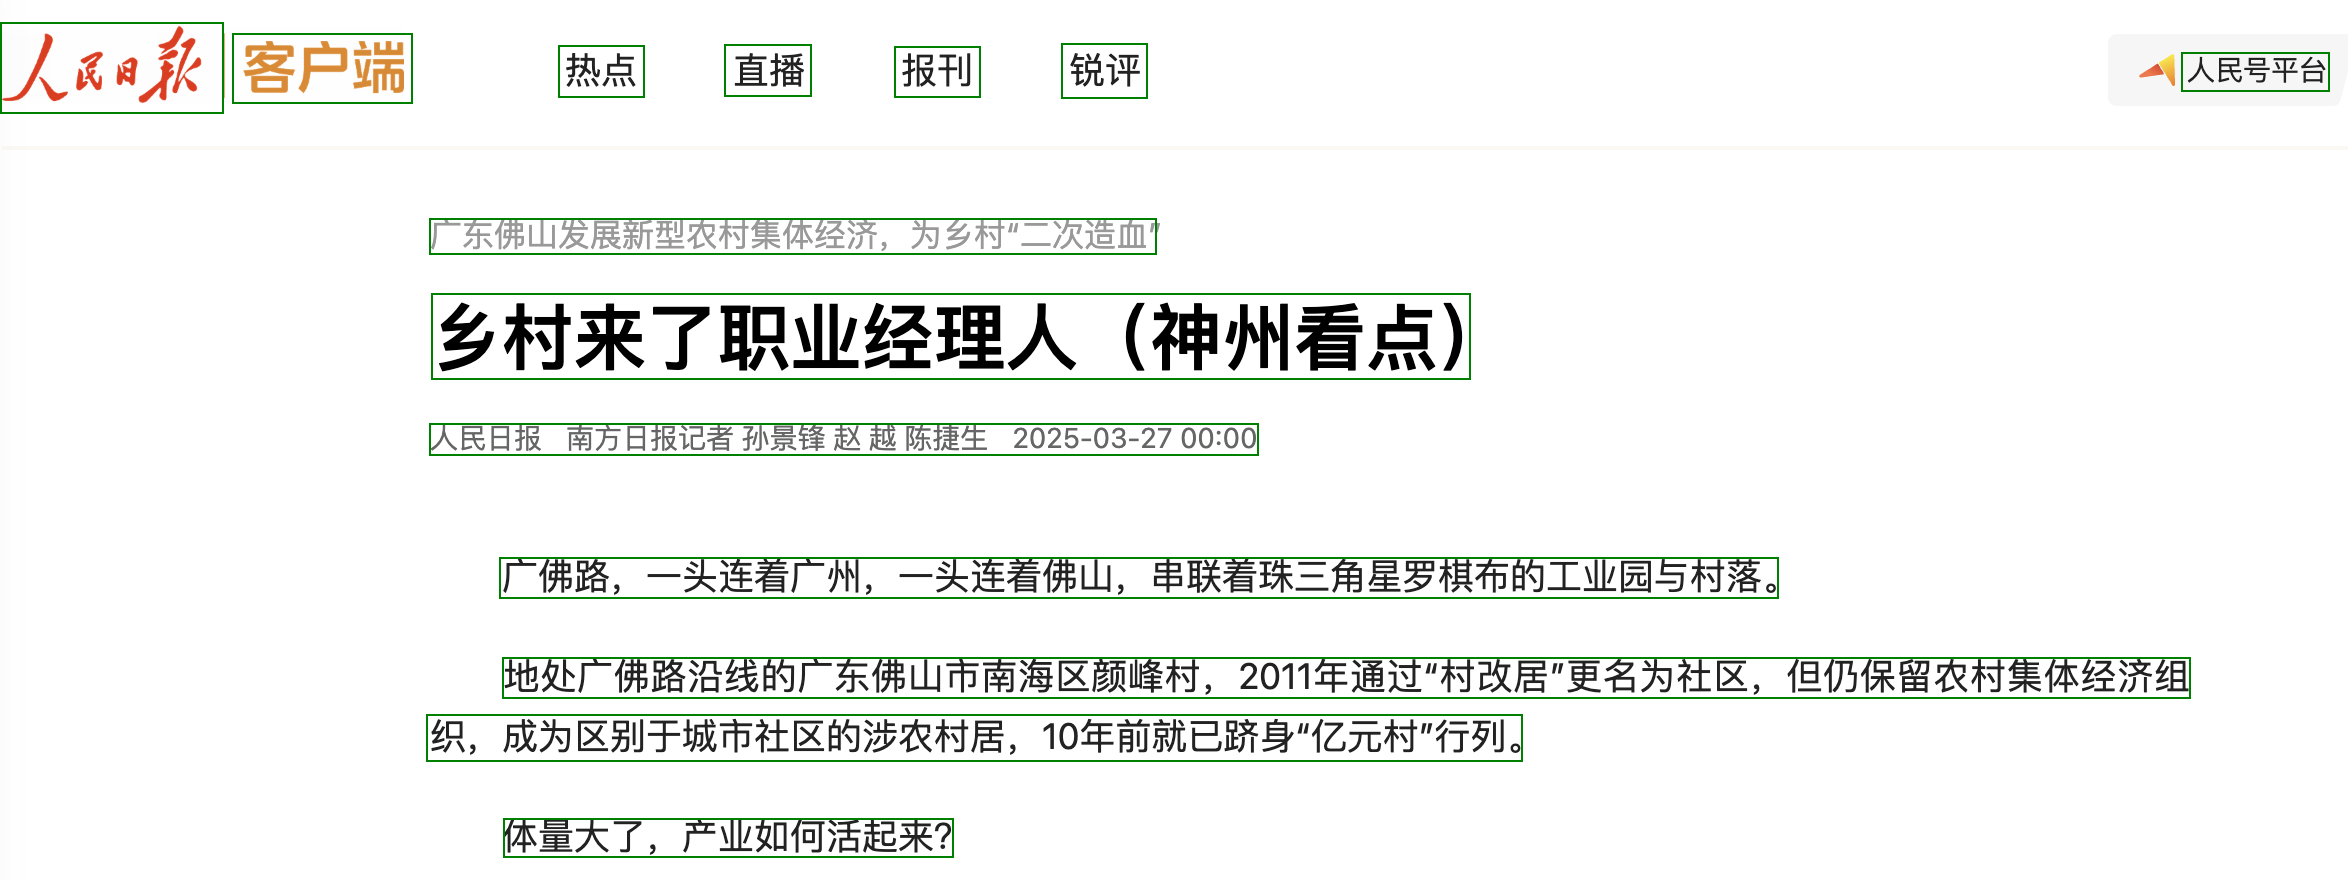

In [1]:
import time

import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.modeling.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter
model = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
p = model.predictor(TextDetectionParamConverter(model.device))
orig_image = Image.open("../../tests/images/test.png").convert("RGB")
start_time = time.time()
detected = p.predict(orig_image)
end_time = time.time()  
print(f"执行时间: {end_time - start_time} 秒")

draw = ImageDraw.Draw(orig_image)
for box in detected.bounding_boxes: # type: ignore
    draw.polygon(
        [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
        outline="green",
        width=2,
    )

display(orig_image)